# Why optimization?

   In machine learning or deep learning, the final goal that we have is to minimise some kind of loss. The loss function is defined differently for different cases. The loss can be convex or even non convex in nature, which depends on the model and the data.

   Now our goal is to find a global minimum for the loss function or if not at all possible, we may have to remain satisfied with local minima too.
    
   Now say our model takes input vectors of length n, thus has parameters $\omega=(\omega_1,\omega_2,\omega_3....\omega_n)$. To find the minima, we run across this n-dimensional $\omega$-space. (This might seem like an over simplification but for the start, let's stay simple).
   So, if a function has to be minimised wrt $\omega$, all our instinct says is, on the $\omega$-space we need to move in that direction along which the values of the function reduce. This is called **Direction search**. We also need to find how much should we move along that direction, this finding procedure is known as **Line search**.

## Why finding a global minimum may not be possible?
Say, the function to optimise we have, has numerous local minima and those points will act as stationary points of the function and our algorithm may get stuck there. Just like in search of the lowest point in a hilly terrain we may stop at a valley which is surely lower than its neighbouring lands but there may be much lower points somewhere else too, which we can't even see. Let's have a look at these situations with examples:

(We'll be able to visualise functions with upto 2 input variables, beyond that we can't simply plot)

## Basic Gradient descent

**Tip:** Run a cell to make the interactive elements work everytime you want to tweak the parameters and see the results.

In [1]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
from jax import jacfwd, jacrev, grad
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib nbagg

### $f_1(x_1,x_2)=x_1^2+x_2^2$

This is a convex function. Let's see how it looks like:

<IPython.core.display.Javascript object>


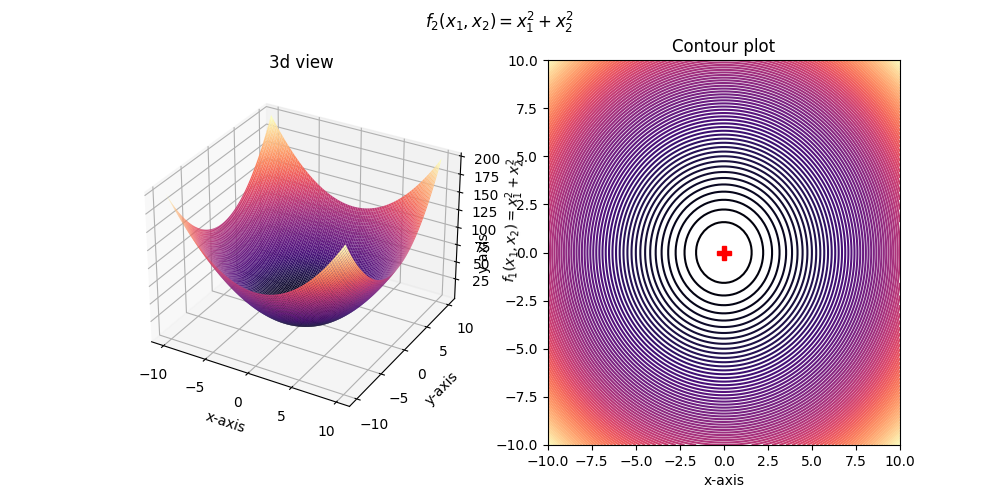

In [2]:
def f1(x):
    return x[0]**2+x[1]**2

fig = plt.figure(figsize=(10,5))
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
x,y=np.meshgrid(x,y)
z=f1((x,y))
plt.suptitle('$f_2(x_1,x_2)=x_1^2+x_2^2$',size=12)

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap="magma",linewidth=0, antialiased=True)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('$f_1(x_1,x_2)=x_1^2+x_2^2$')
plt.title("3d view",size=12)

ax = fig.add_subplot(1, 2, 2)
ax.contour(x,y,z,80,cmap="magma",antialiased=True)
plt.title("Contour plot",size=12)
plt.plot(0,0,"Pr",ms=10)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
plt.show()

The shape of the function tells that it has one global minimum only (can be shown mathematically too), and the smoothness of the surface indicates that finding its minimum will be very easy. Say we roll a ball along its surface starting from any point, the ball will eventually reach the global minima (0,0) here.

Before going further let's define gradient of a function:
$\nabla f(x_1,x_2,...,x_n)=\Bigg[\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},...,\frac{\partial f}{\partial x_n}\Bigg]$

This basically gives us an n-dimensional vector which is along the direction that shows maximum rise in the function value at a particular point. This is helpful for us as we are looking for a direction that shows maximum drop in value at a certain point and that would be just the opposite of gradient direction. So our chosen direction will be **$-\nabla f(x_1,x_2,...,x_n)$**.

Let us see how things work in real. We'll start from an arbitrary point and keep going along the negative of the gradient of the function mentioned above until the gradient becomes zero (or close to zero). This should take us to the minimum here. And this method is known as **Gradient descent** popularly.

In [3]:
def GD(f,start,lr=0.5,e=10e-4):
    """
    Gradient descent with fixed step length
    
    f: function to be minimised
    start: starting point
    lr: learning rate (step length of descent), default value=0.5
    e: tolerance (f(x_{k+1})-f(x_{k})),default value=10e-4
    
    example:
    GD(f,(1,3),lr=0.4,e=10e-6)
    
    """
    x=np.array(start,dtype="float32")
    g=jacrev(f)
    y=x-lr*g(x)
    l=[x,y]
    G=[np.linalg.norm(g(x)),np.linalg.norm(g(x))]
    while np.abs(f(y)-f(x))>e:
        x=y
        y=y-lr*g(y)
        l.append(y)
        G.append(np.linalg.norm(g(x)))
    return {"Points":l,"Gradient_value":G}

In [4]:
def split(x):
    a=np.array(x)
    X=[]
    for i in range(a.shape[1]):
        xi=a[:,i]
        X.append(xi)
    return (X)

Now, we'll see how changing the learning rate (step size) can affect the path towards the minimum:

<IPython.core.display.Javascript object>


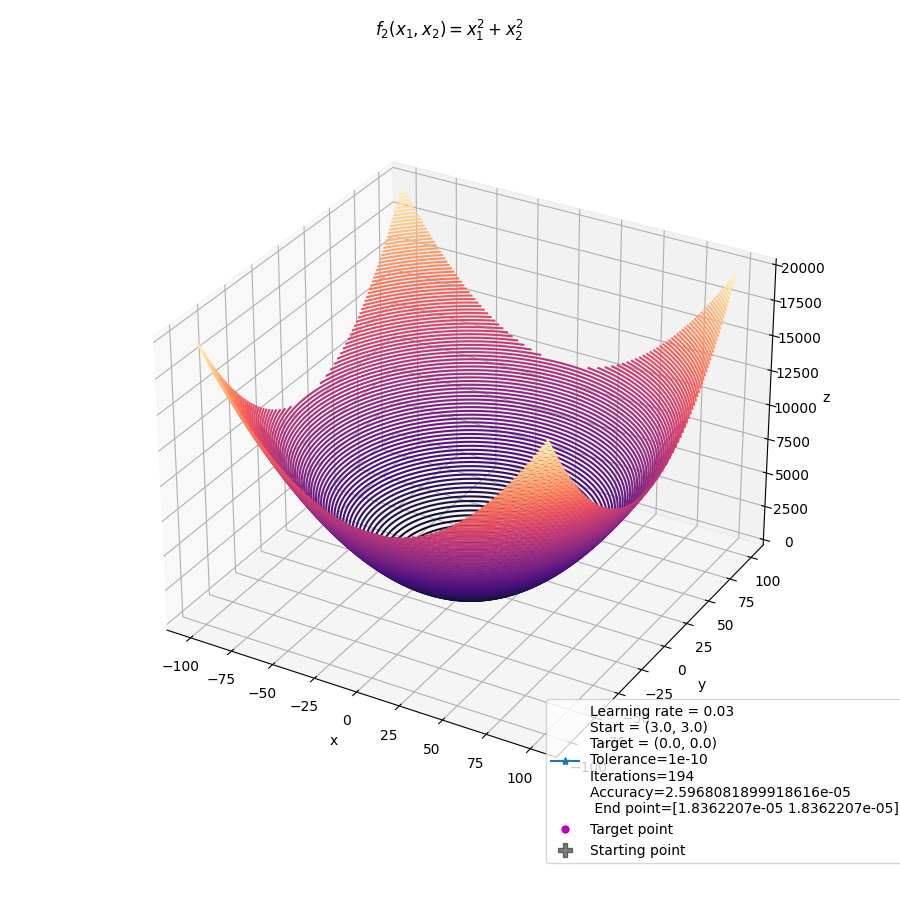

interactive(children=(FloatSlider(value=3.0, description='Start point X:', min=-100.0), FloatSlider(value=3.0,…

In [5]:
## 3D interactive plot

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
plt.suptitle('$f_2(x_1,x_2)=x_1^2+x_2^2$',size=12)
def update_plot(startx, starty, lr,e,targx,targy):
    x = np.linspace(-100, 100, 400)
    y = np.linspace(-100, 100, 400)
    X, Y = np.meshgrid(x, y)
    Z = f1((X, Y))
    ax.clear()
    vals=GD(f1,(startx,starty),lr=lr,e=e)
    x,y=split(vals["Points"])
    z=[f1(p) for p in vals["Points"]]
    units = 'Learning rate = {} \nStart = {} \nTarget = {} \nTolerance={} \nIterations={} \nAccuracy={} \n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,np.linalg.norm(vals["Points"][-1]-np.array([targx,targy])),vals["Points"][-1]))
    ax.plot(targx,targy,f1((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f1((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.03,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-100, max=100, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-100, max=100, value=3, description='Start point Y:')
targx = widgets.FloatSlider(min=-100, max=100, value=0, description='Target point X:')
targy = widgets.FloatSlider(min=-100, max=100, value=0, description='Target point Y:')
e=widgets.FloatLogSlider(base=10,min=-10, max=-1, value=-3,step=1, description='Tolerance:')

widgets.interactive(update_plot,startx=startx,starty=starty, lr=lr,targx=targx,targy=targy,e=e)

The variation in learning rate (step length) changes the number of steps to reach the desired point and also intorduces zigzagging. This fact exhibits the role of the learning rate in convergence. That is why selection of the learning rate becomes an important issue when trying to find the minimum of a function using these descent methods.

We can select one fixed learning rate, or we may opt for dynamic learning rates (that change in every or some steps of the descent) to optimize our search of the minimum.

We also need to see if the shape of the function and starting point has any effect on the path. For that we define a new function:
$f_2(x_1,x_2)=x_1^2+9x_2^2$

### $f_2(x_1,x_2)=0.1x_1^2+4x_2^2$

<IPython.core.display.Javascript object>


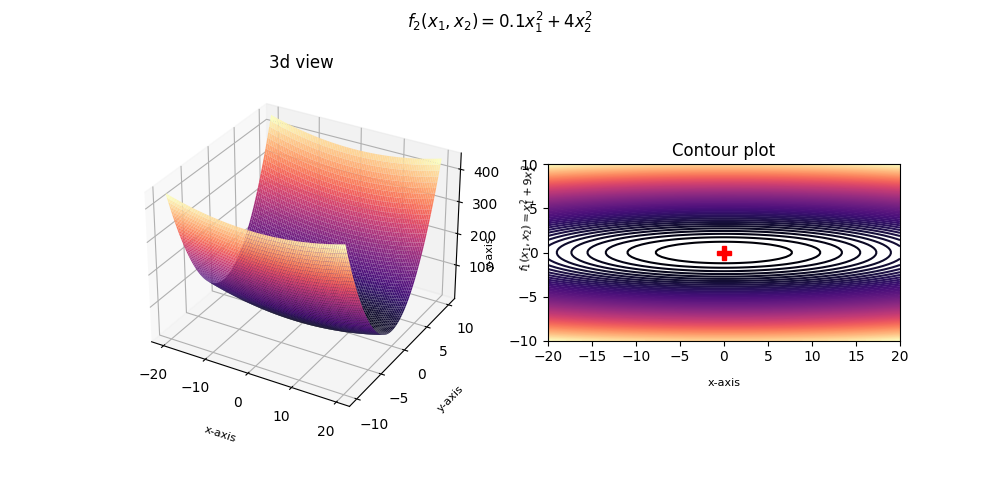

In [6]:
def f2(x):
    return 0.1*(x[0]**2)+4*x[1]**2

fig = plt.figure(figsize=(10,5))
plt.suptitle('$f_2(x_1,x_2)=0.1x_1^2+4x_2^2$',size=12)
x=np.linspace(-20,20,100)
y=np.linspace(-10,10,100)
x,y=np.meshgrid(x,y)
z=f2((x,y))

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap="magma",linewidth=0, antialiased=True)
ax.set_xlabel('x-axis',size=8,labelpad=10)
ax.set_ylabel('y-axis',size=8,labelpad=10)
ax.set_zlabel('$f_1(x_1,x_2)=x_1^2+9x_2^2$',size=8,labelpad=10)
plt.title("3d view",size=12)

ax = fig.add_subplot(1, 2, 2)
ax.contour(x,y,z,80,cmap="magma",antialiased=True)
plt.axis("scaled")
plt.title("Contour plot",size=12)
plt.plot(0,0,"Pr",ms=10)
ax.set_xlabel('x-axis',size=8,labelpad=10)
ax.set_ylabel('y-axis',size=8,labelpad=10)
plt.show()

<IPython.core.display.Javascript object>


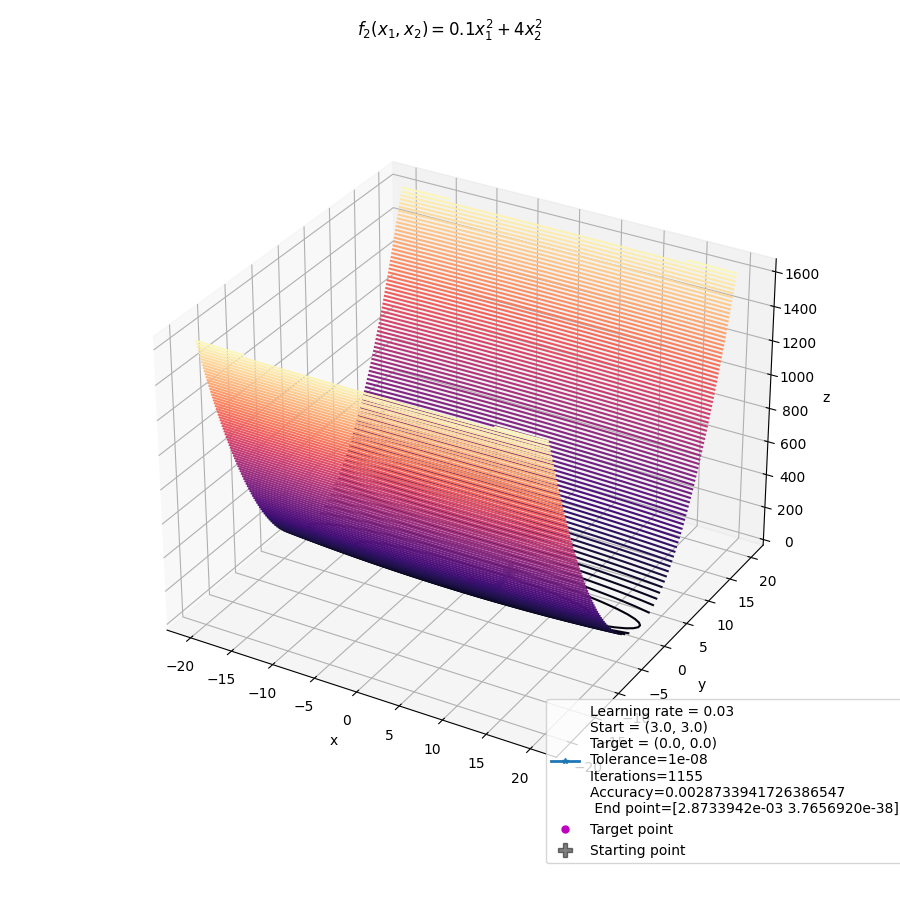

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [7]:
## 3D interactive plot

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))
plt.suptitle('$f_2(x_1,x_2)=0.1x_1^2+4x_2^2$',size=12)
def update_plot(startx, starty, lr,e,targx,targy):
    
    ax.clear()
    vals=GD(f2,(startx,starty),lr=lr,e=e)
    x,y=split(vals["Points"])
    z=[f2(p) for p in vals["Points"]]
    units = 'Learning rate = {} \nStart = {} \nTarget = {} \nTolerance={} \nIterations={} \nAccuracy={} \n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",lw=2,ms=4,label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,np.linalg.norm(vals["Points"][-1]-np.array([targx,targy])),vals["Points"][-1]))
    ax.plot(targx,targy,f2((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f2((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.03,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
targx = widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
targy = widgets.FloatSlider(min=-20, max=20, value=0, description='Target point Y:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')

widgets.interactive(update_plot,startx=startx,starty=starty, lr=lr,targx=targx,targy=targy,e=e)

The above two cases show how the shape of the function affects the path of convergence even if the function is convex. These show that for different starting points the descent in the function $f_1(x_1,x_2)=x_1^2+x_2^2$ is of same nature but the whole thing gets disturbed when the same procedure is applied on the function $f_2(x_1,x_2)=0.1x_1^2+4x_2^2$ (This one is ill-conditioned).

Now we'll take a function which has more than one local minima and see how the gradient descent algorithm behaves:
Let $f_3(x_1,x_2)=(1-x_1^2)^2+(x_1-x_2^2)^2$

<IPython.core.display.Javascript object>


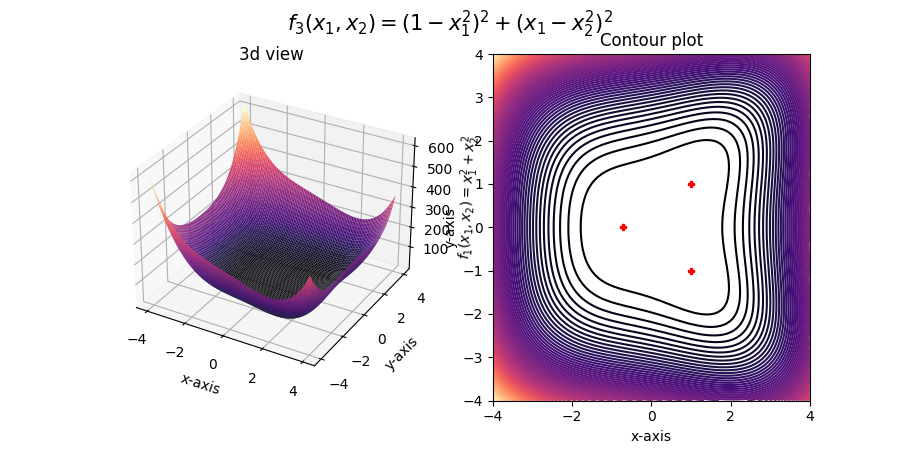

In [8]:
def f3(x):
    return (1-x[0]**2)**2+(x[0]-x[1]**2)**2

fig = plt.figure(figsize=(9,4.5))
plt.suptitle("$f_3(x_1,x_2)=(1-x_1^2)^2+(x_1-x_2^2)^2$",size=15)
x=np.linspace(-4,4,100)
y=np.linspace(-4,4,100)
x,y=np.meshgrid(x,y)
z=f3((x,y))

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap="magma",linewidth=0, antialiased=True)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('$f_1(x_1,x_2)=x_1^2+x_2^2$')
plt.title("3d view")

ax = fig.add_subplot(1, 2, 2)
ax.contour(x,y,z,80,cmap="magma",antialiased=True)
plt.title("Contour plot")
plt.plot(1,1,"Pr",ms=5)
plt.plot(1,-1,"Pr",ms=5)
plt.plot(-(1/np.sqrt(2)),0,"Pr",ms=5)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
plt.show()

<IPython.core.display.Javascript object>


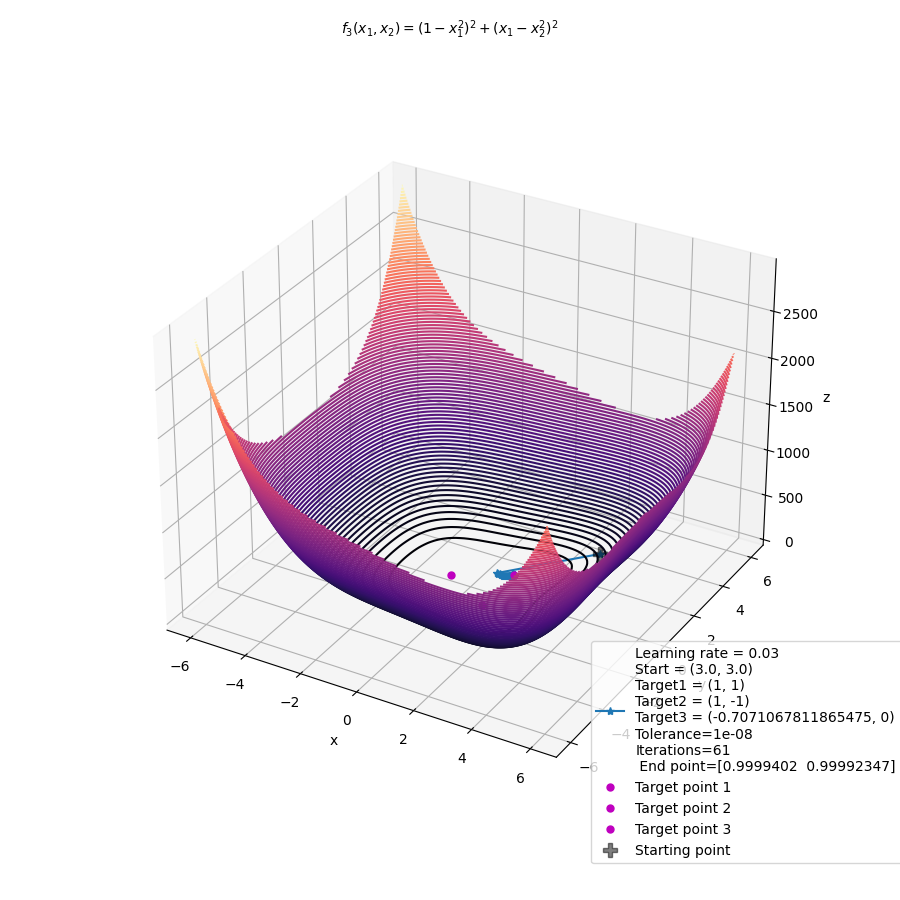

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [9]:
## 3D interactive plot

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f3((X, Y))
plt.suptitle("$f_3(x_1,x_2)=(1-x_1^2)^2+(x_1-x_2^2)^2$",size=10)
def update_plot(startx, starty, lr,e):
    
    ax.clear()
    vals=GD(f3,(startx,starty),lr=lr,e=e)
    x,y=split(vals["Points"])
    z=[f3(p) for p in vals["Points"]]
    units = 'Learning rate = {} \nStart = {} \nTarget1 = {}\nTarget2 = {}\nTarget3 = {} \nTolerance={} \nIterations={}\n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(1,1),(1,-1),(-1/np.sqrt(2),0),e,len(x)-1,vals["Points"][-1]))
    ax.plot(1,1,f3((1,1)),"om",label="Target point 1",ms=5)
    ax.plot(1,-1,f3((1,-1)),"om",label="Target point 2",ms=5)
    ax.plot(-1/np.sqrt(2),0,f3((-1/np.sqrt(2),0)),"om",label="Target point 3",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f3((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.03,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')

widgets.interactive(update_plot,startx=startx,starty=starty, lr=lr,e=e)

The above cases portray the fact that in case of functions with more than one stationary points, we may end up at different ones depending on the starting point and may not even reach the global minimum everytime. This shows that our algorithms are sensitive to the starting points too along with learning rate.
Moreover, one should notice that the overshoot due to a far starting point can be controlled with a lower learning rate.

## Introducing variable learning rate:
So far we were working with constant learning rate, but as we mentioned above, we can have variable learning rates to improve the rate of convergence or the accuracy.
One such important rule to update learning rate at every step is the Armijo rule.
Say, we are at a point $x_k$ and want to reach the next point $x_{k+1}$,
then, $x_{k+1}=x_k-\alpha_k \nabla f(x_k)$, where $\alpha_k$ is the learning rate (usually between 0 to 1) at point $x_k$.
We need to choose $\alpha$ such that $f(x_{k+1})<f(x_k)$ (always the descent direction does not guarantee reaching a new point with lower value, here learning rate (step length) plays the most vital role).
We select $\alpha$ as mentioned below:
$f(x_k+\alpha p_k)\leq f(x_k)+c_1p_k^T\nabla f(x_k)$ where $p_k$ is the chosen direction to move (which in normal case will be $-\nabla f(x_k)$).

In [10]:
## Armijo rule to find step length
def armijo(f,x,l_rate=0.5,beta=0.5,sigma=0.5):
    """
    f: Function to be handled
    x: The point x_k
    l_rate: Initial learning rate fed to algorithm (default value=0.5)
    beta: Reduction rate of alpha (default value=0.5)
    sigma: Upperbound setter for function value at x_{k+_1} (default value=0.7)
    """
    x=np.array(x,dtype="float32")
    l=[l_rate]
    g=jacrev(f)
    s=-g(x)
    d=l_rate*s
    while f(x)-f(x+d)<-l_rate*sigma*g(x).T@s:
        l_rate1=beta*l_rate
        d=l_rate*s
        l.append(l_rate1)
    return(l[-1])

In [11]:
## Gradient descent with Armijo
def GDA(f,start,e=10e-4,lr=0.5,beta=0.5,sigma=0.7):
    """
    f: Function to be handled
    x: starting point
    e: tolerance
    lr: Initial learning rate fed to algorithm (default value=0.5)
    beta: Reduction rate of alpha (default value=0.5)
    sigma: Upperbound setter for function value at x_{k+_1} (default value=0.7)
    """
    x=np.array(start,dtype="float32")
    g=jacrev(f)
    lr1=armijo(f,x,lr,beta,sigma)
    y=x-lr1*g(x)
    l=[x,y]
    G=[np.linalg.norm(g(x)),np.linalg.norm(g(x))]
    lrs=[lr1]
    while np.abs(f(y)-f(x))>e:
        x=y
        lr2=armijo(f,x,lr,beta,sigma)
        y=y-lr2*g(y)
        l.append(y)
        G.append(np.linalg.norm(g(x)))
        lrs.append(lr2)
    return {"Points":l,"Gradient_value":G,"Learning rate":lrs}

<IPython.core.display.Javascript object>


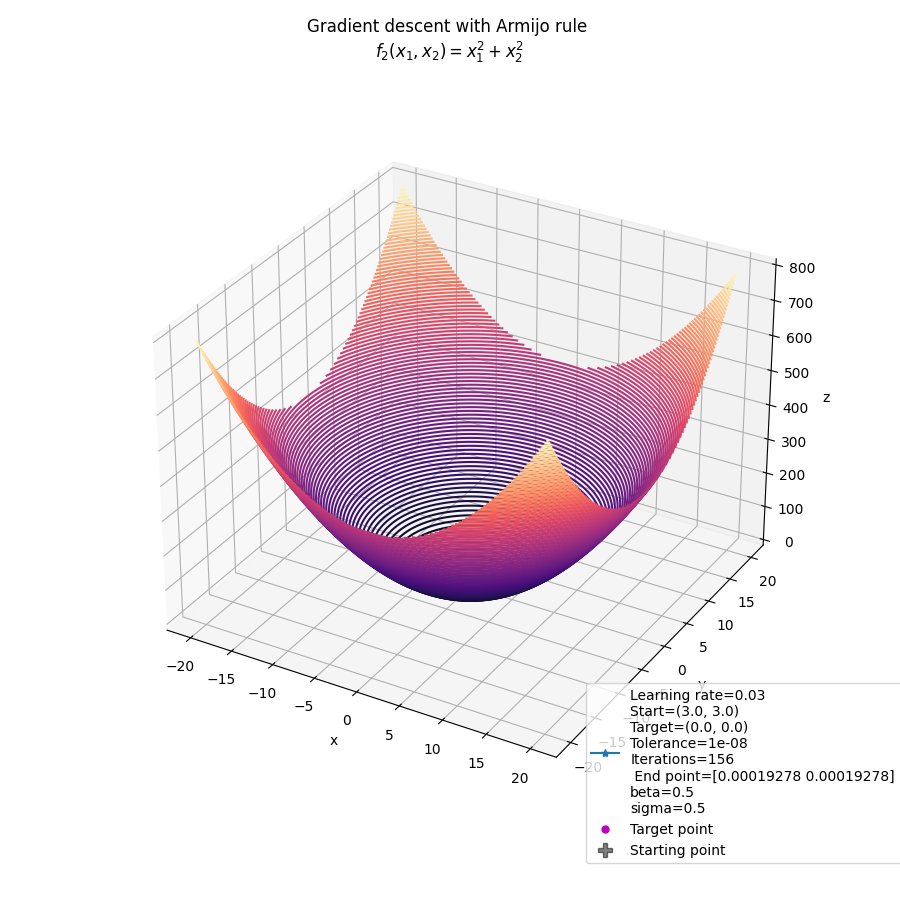

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [12]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f1((X, Y))
plt.suptitle('Gradient descent with Armijo rule \n$f_2(x_1,x_2)=x_1^2+x_2^2$',size=12)

def update_plot(startx, starty,targx,targy, lr,e,beta,sigma):
    
    ax.clear()
    vals=GDA(f1,(startx,starty),lr=lr,e=e,beta=beta,sigma=sigma)
    x,y=split(vals["Points"])
    z=[f1(p) for p in vals["Points"]]
    units = 'Learning rate={} \nStart={} \nTarget={} \nTolerance={} \nIterations={}\n End point={} \nbeta={}\nsigma={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,vals["Points"][-1],beta,sigma))
    ax.plot(targx,targy,f1((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f1((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.03,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
targx=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
targy=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')
beta = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='beta for Armijo:')
sigma = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='$\sigma$ for Armijo:')

widgets.interactive(update_plot,startx=startx,starty=starty,targx=targx,targy=targy, lr=lr,e=e,beta=beta,sigma=sigma)

<IPython.core.display.Javascript object>


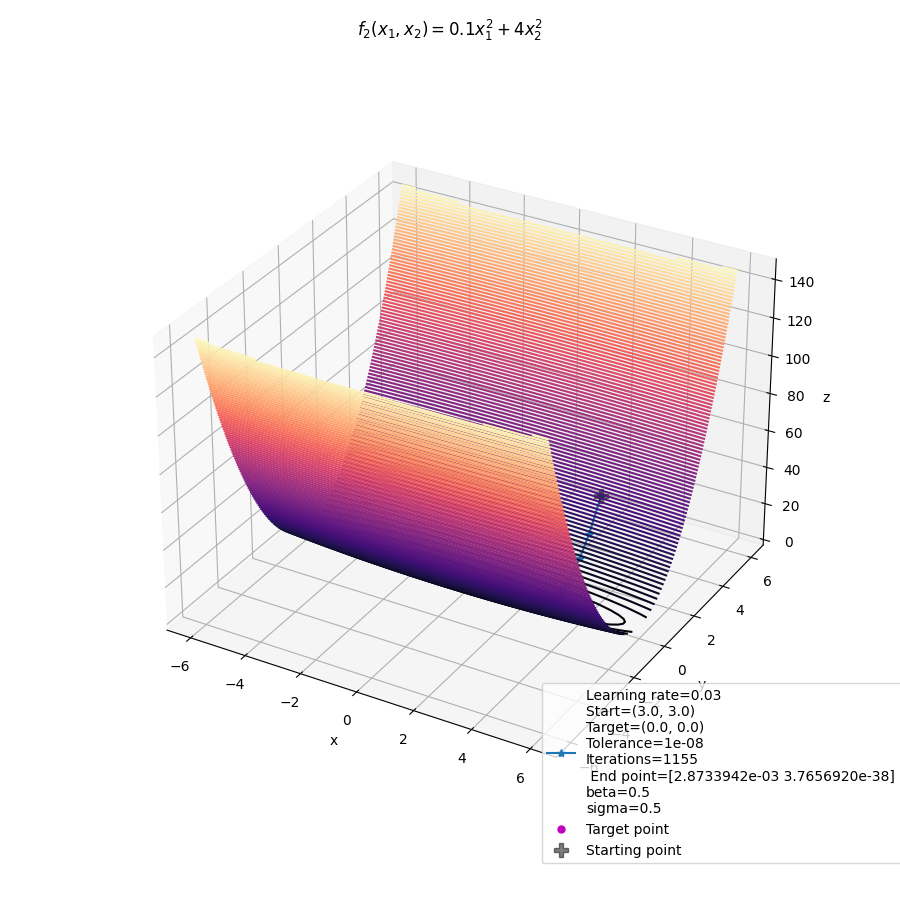

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=6.0, min=-6.0), FloatSlider(val…

In [13]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))
plt.suptitle('$f_2(x_1,x_2)=0.1x_1^2+4x_2^2$',size=12)
def update_plot(startx, starty,targx,targy, lr,e,beta,sigma):
    
    ax.clear()
    vals=GD(f2,(startx,starty),lr=lr,e=e)
    x,y=split(vals["Points"])
    z=[f2(p) for p in vals["Points"]]
    units = 'Learning rate={} \nStart={} \nTarget={} \nTolerance={} \nIterations={}\n End point={} \nbeta={}\nsigma={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,vals["Points"][-1],beta,sigma))
    ax.plot(targx,targy,f2((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f2((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.03,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-6, max=6, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-6, max=6, value=3, description='Start point Y:')
targx=widgets.FloatSlider(min=-6, max=6, value=0, description='Target point X:')
targy=widgets.FloatSlider(min=-6, max=6, value=0, description='Target point X:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')
beta = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='beta for Armijo:')
sigma = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='$\sigma$ for Armijo:')

widgets.interactive(update_plot,startx=startx,starty=starty,targx=targx,targy=targy, lr=lr,e=e, beta=beta, sigma=sigma)

The above cases show that introducing Armijo Line search reduces the zigzagging in the path, which is obvious as we are setting an upper bound for the function value at the next point.

## Newton's method:
We move on to Newton's method which uses both the gradient and the Hessian of a function to reach the minima. For this the Hessian of the function has to exist and be invertible in nature.
according to this method, $x_{k+1}=x_k-\alpha (H(x_k))^{-1}\nabla f(x_k)$.

This $(H(x_k))^{-1}\nabla f(x_k)$ is the Newton direction.

In [14]:
#Newton direction
def nd(f,x):
    x=np.array(x,dtype="float32")
    H=jacfwd(jacrev(f))
    g=jacrev(f)
    d=-np.linalg.inv(H(x))@g(x)
    return d

In [15]:
# Gradient descent using Newton method
def GDN(f,start,lr=0.5,e=10e-4):
    """
    f: Function to be optimized
    start: Starting point
    alpha: Learning rate (default value=0.5)
    e: Tolerance (default value=10e-4)
    """
    x=np.array(start,dtype="float32")
    d=nd(f,x)
    y=x+lr*d
    l=[x,y]
    while np.abs(f(y)-f(x))>e:
        x=y
        d=nd(f,x)
        y=y+lr*d
        l.append(y)
    return l

<IPython.core.display.Javascript object>


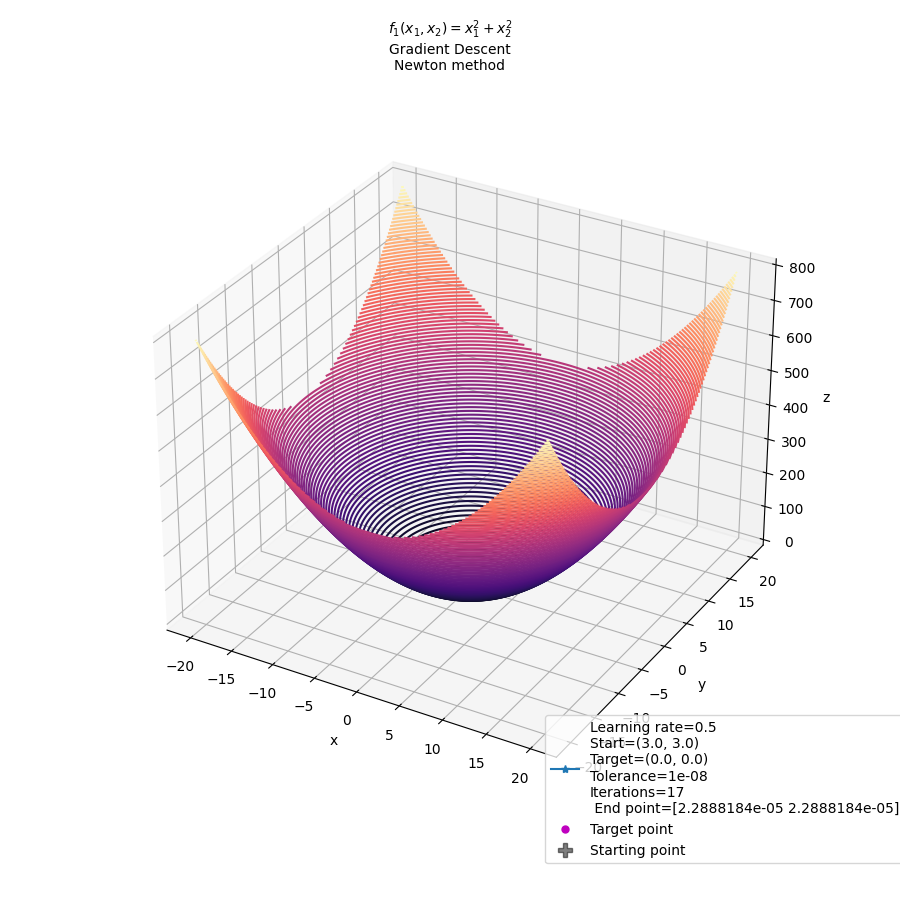

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [16]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f1((X, Y))
plt.suptitle("$f_1(x_1,x_2)=x_1^2+x_2^2$\nGradient Descent\nNewton method",size=10)

def update_plot(startx, starty,targx,targy, lr, e):
    
    ax.clear()
    vals=GDN(f1,(startx,starty),lr=lr,e=e)
    x,y=split(vals)
    z=[f1(p) for p in vals]
    units = 'Learning rate={} \nStart={} \nTarget={} \nTolerance={} \nIterations={}\n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,vals[-1],beta,sigma))
    ax.plot(targx,targy,f1((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f1((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
targx=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
targy=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')



widgets.interactive(update_plot,startx=startx,starty=starty,targx=targx,targy=targy, lr=lr,e=e)


<IPython.core.display.Javascript object>


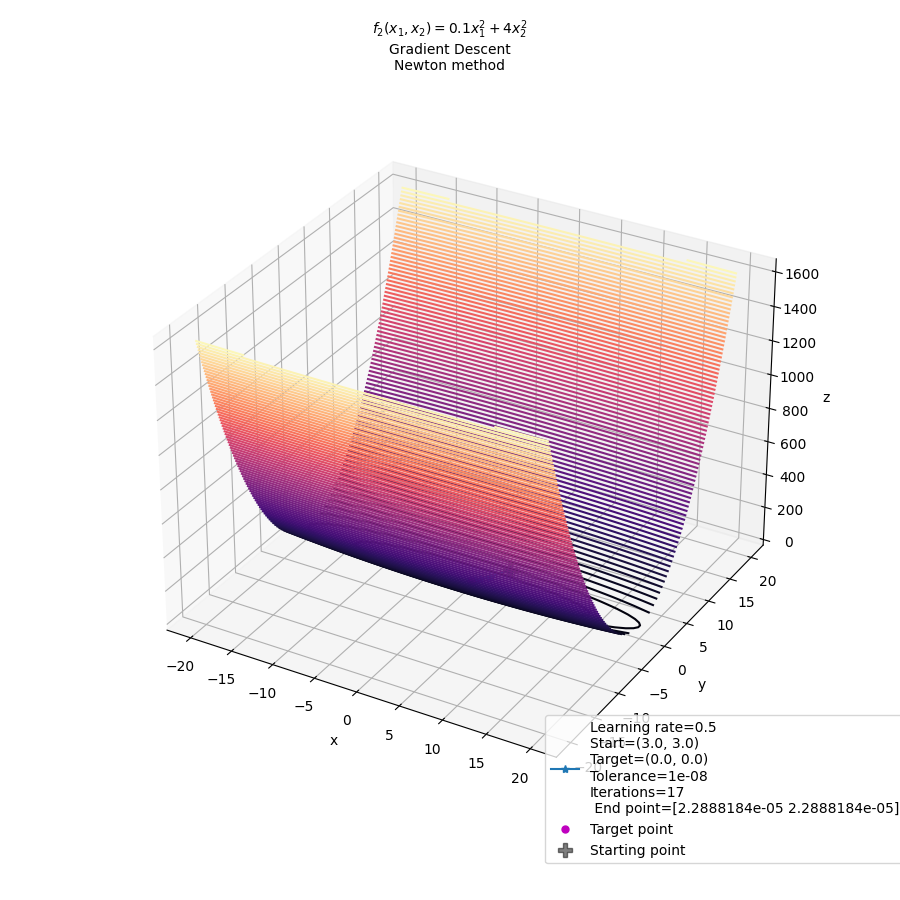

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [17]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f2((X, Y))
plt.suptitle("$f_2(x_1,x_2)=0.1x_1^2+4x_2^2$\nGradient Descent\nNewton method",size=10)

def update_plot(startx, starty,targx,targy, lr, e):
    
    ax.clear()
    vals=GDN(f2,(startx,starty),lr=lr,e=e)
    x,y=split(vals)
    z=[f2(p) for p in vals]
    units = 'Learning rate={} \nStart={} \nTarget={} \nTolerance={} \nIterations={}\n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(targx,targy),e,len(x)-1,vals[-1],beta,sigma))
    ax.plot(targx,targy,f2((targx,targy)),"om",label="Target point",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f2((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
targx=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
targy=widgets.FloatSlider(min=-20, max=20, value=0, description='Target point X:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')



widgets.interactive(update_plot,startx=startx,starty=starty,targx=targx,targy=targy, lr=lr,e=e)

<IPython.core.display.Javascript object>


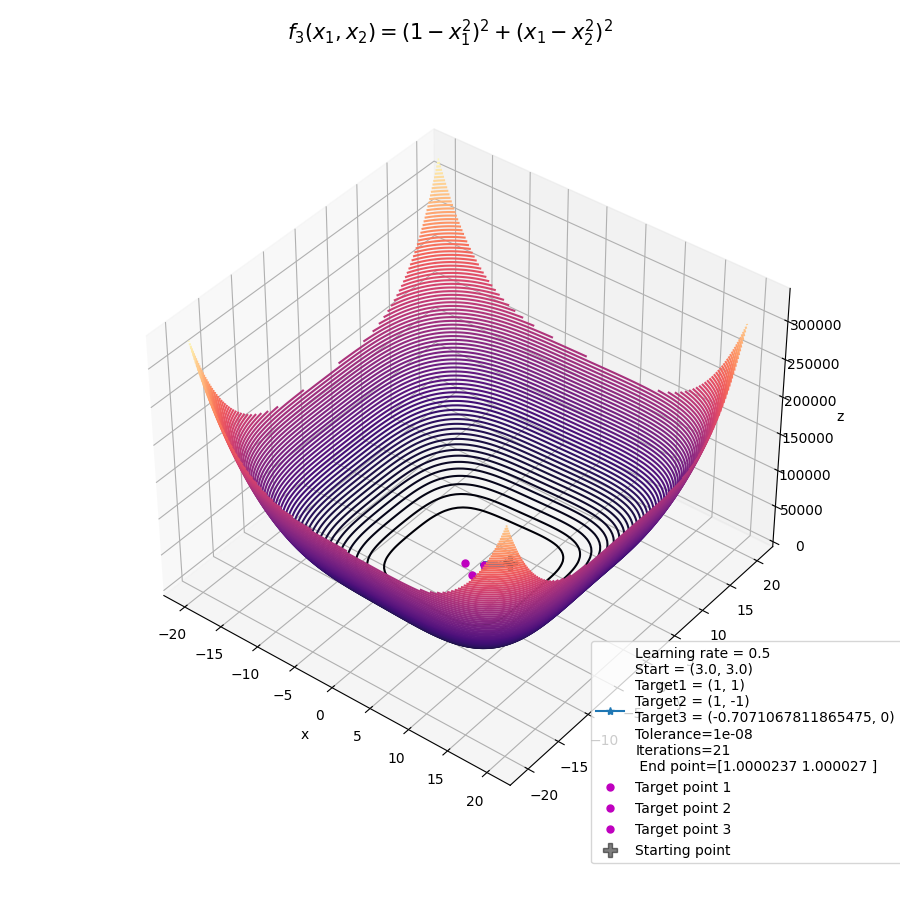

interactive(children=(FloatSlider(value=3.0, description='Start point X:', max=20.0, min=-20.0), FloatSlider(v…

In [19]:
## 3D interactive plot

fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f3((X, Y))
plt.suptitle("$f_3(x_1,x_2)=(1-x_1^2)^2+(x_1-x_2^2)^2$",size=15)
def update_plot(startx, starty, lr,e):
    
    ax.clear()
    vals=GDN(f3,(startx,starty),lr=lr,e=e)
    x,y=split(vals)
    z=[f3(p) for p in vals]
    units = 'Learning rate = {} \nStart = {} \nTarget1 = {}\nTarget2 = {}\nTarget3 = {} \nTolerance={} \nIterations={}\n End point={}'
    ax.contour3D(X,Y,Z,100,cmap="magma")
    ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(1,1),(1,-1),(-1/np.sqrt(2),0),e,len(x)-1,vals[-1]))
    ax.plot(1,1,f3((1,1)),"om",label="Target point 1",ms=5)
    ax.plot(1,-1,f3((1,-1)),"om",label="Target point 2",ms=5)
    ax.plot(-1/np.sqrt(2),0,f3((-1/np.sqrt(2),0)),"om",label="Target point 3",ms=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot(startx,starty,f3((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
    ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
    plt.show()


lr = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='Learning rate:')
startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')

widgets.interactive(update_plot,startx=startx,starty=starty, lr=lr,e=e)

This shows that Newton Descent makes the procedure a much smoother one to reach the minimum.

## Steepest descent using Armijo step length and Newton direction

In [20]:
def SDAN(f,x,lr=0.5,beta=0.5,sigma=0.5,e=10e-3):
    """
    f: The function to be minimized
    x: Starting point
    lr: Initial learning rate fed to algorithm (default value=0.5)
    beta: Reduction rate of alpha (default value=0.5)
    sigma: Upperbound setter for function value at x_{k+_1} (default value=0.7)
    """
    x=np.array(x,dtype="float32")
    d=nd(f,x)
    lr1=armijo(f,x,lr,beta,sigma)
    y=x+lr1*d
    l=[x,y]
    while np.abs(f(y)-f(x))>e:
        x=y
        lr2=armijo(f,x,lr1,beta,sigma)
        d=nd(f,x)
        y=y+lr2*d
        l.append(y)
    return l

In [ ]:
## 3D interactive plot

# fig = plt.figure(figsize=(9,9))
# ax = plt.axes(projection='3d')
# x = np.linspace(-20, 20, 100)
# y = np.linspace(-20, 20, 100)
# X, Y = np.meshgrid(x, y)
# Z = f1((X, Y))
# plt.suptitle("Steepest descent using Armijo step length and Newton direction\n$f_1(x_1,x_2)=x_1^2+x_2^2$",size=15)
# def update_plot(startx, starty, lr,beta,sigma,e):
    
#     ax.clear()
#     vals=SDAN(f1,(startx,starty),lr,beta=beta,sigma=sigma,e=e)
#     x,y=split(vals)
#     z=[f1(p) for p in vals]
#     units = 'Learning rate = {} \nStart = {} \nTarget1 = {}\nTarget2 = {}\nTarget3 = {} \nTolerance={} \nIterations={}\n End point={}'
#     ax.contour3D(X,Y,Z,100,cmap="magma")
#     ax.plot(x,y,z,"-*",label=units.format(lr,(startx,starty),(1,1),(1,-1),(-1/np.sqrt(2),0),e,len(x)-1,vals[-1]))
#     ax.plot(0,0,f1((1,1)),"om",label="Target point 1",ms=5)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
#     ax.plot(startx,starty,f1((startx,starty)),"Pk",ms=10,alpha=0.5,label="Starting point")
#     ax.legend(loc='lower right',bbox_to_anchor=(1.15, -0.1))
#     plt.show()


# lr = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='Learning rate:')
# startx = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point X:')
# starty = widgets.FloatSlider(min=-20, max=20, value=3, description='Start point Y:')
# e=widgets.FloatLogSlider(base=10,min=-8, max=-1, value=-3,step=1, description='Tolerance:')
# beta = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='beta for Armijo:')
# sigma = widgets.FloatSlider(min=0, max=1, value=0.5,step=0.01, description='$\sigma$ for Armijo:')

# widgets.interactive(update_plot,startx=startx,starty=starty,beta=beta,sigma=sigma, lr=lr,e=e)

We have not run the previous cell as it takes a lot of time which indicates that when we are using Armijo rule to find the learning rate in each step clubbed with Newton Direction, the process of descent may be more accurate but much slower. This happens majorly due to the calculation of the Hessian in each step.

To make the whole process faster and memory efficientg, we avoid this method involving second order calculations and engineer first order methods to achieve almost same degree of accuracy.

We'll explore those modifications in the next notebook.